## Principal Component Analysis (Step by Step)

In [1]:
# Cargando las bibliotecas necesarias
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn import svm
import util 
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Cargando los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Escalando los datos

In [3]:
#Escalamos los datos:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Obteniendo matriz de covarianza y auto vectores y valores

In [4]:
#Matriz de covarianza, eigenvalues y eigenvectors
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 2.89976476  0.98710977  0.13476983  0.01681717]


In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
#np.cumsum nos permitirá calcular el acumulado de la varianza para el plot
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[0.71803698889091139, 0.24442718138870981, 0.033371577775729536, 0.0041642519446493378]
[ 0.71803699  0.96246417  0.99583575  1.        ]


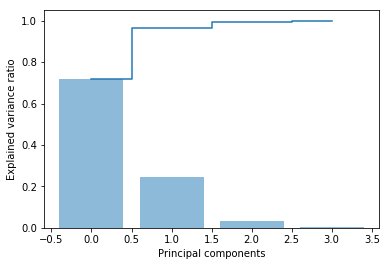

In [6]:
plt.bar(list(range(0, len(eigen_vals))), var_exp, alpha=0.5, align='center')
plt.step(list(range(0, len(eigen_vals))), cum_var_exp, where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [7]:
def get_transformation_matrix(eigen_vals, eigen_vecs, n_vectors = 2):
    # Build a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    #Choose the number of eigenvectors which compose the transformation matrix (n_vector)
    w = np.empty(shape=(len(eigen_pairs[0][1]),0))
    for n in range(0,n_vectors):
        w = np.column_stack((w, eigen_pairs[n][1]))
    return w

In [8]:
w = get_transformation_matrix(eigen_vals, eigen_vecs,2)
print(w)

[[  5.35500399e-01  -3.25611548e-01]
 [ -2.04195389e-01  -9.44913832e-01]
 [  5.86174262e-01   9.09058855e-04]
 [  5.72663340e-01  -3.33787741e-02]]


TrainPCA: (105, 2)


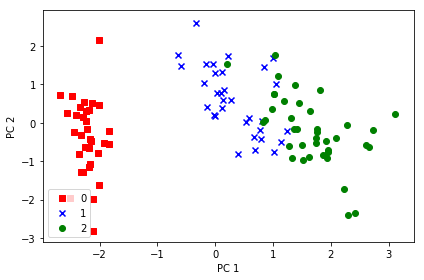

In [9]:
X_train_pca = X_train_std.dot(w)
print("TrainPCA: "+ str(X_train_pca.shape))
colors = ['r', 'b', 'g'] #coloquen tantos colores como clases tengan
markers = ['s', 'x', 'o'] #coloquen tantos marcadores como clases tengan

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Usan PCA de SKlearn

In [10]:
# Normalizando los datos
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

[ 0.71803699  0.24442718  0.03337158  0.00416425]


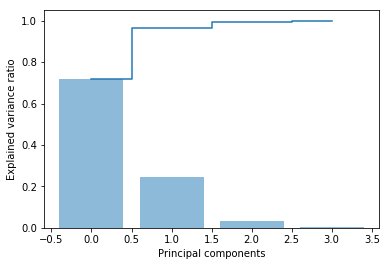

In [11]:
# Importando biblioteca de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)

plt.bar(list(range(0,4)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(list(range(0,4)), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


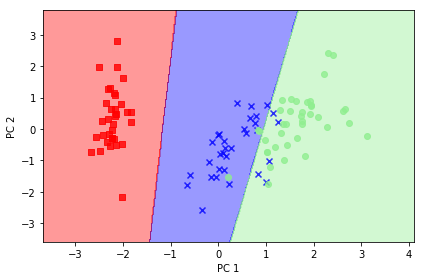

In [12]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
svc = svm.SVC(kernel = 'linear')
svc = svc.fit(X_train_pca, y_train)

util.plot_decision_regions_without_ds(X_train_pca, y_train, classifier=svc)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()


### Kernel PCA

In [13]:
# Importando biblioteca KernelPCA
from sklearn.decomposition import KernelPCA

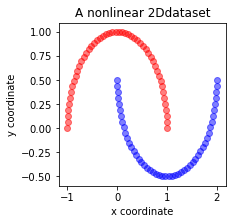

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(3,3))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

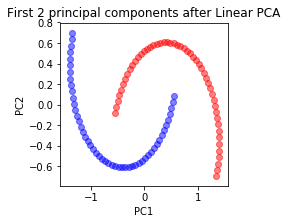

In [15]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.figure(figsize=(3,3))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

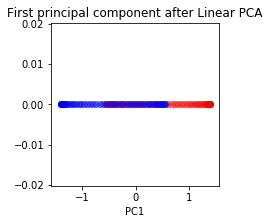

In [16]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)
plt.figure(figsize=(3,3))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

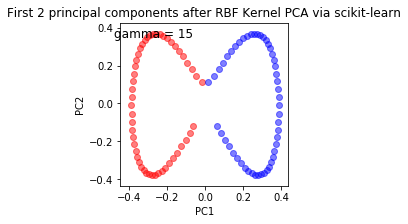

In [17]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=12)
X_skernpca = scikit_kpca.fit_transform(X)
plt.figure(figsize=(3,3))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)
plt.text(-0.48, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

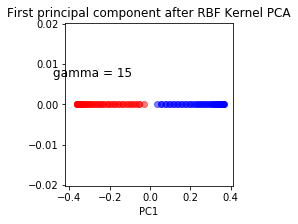

In [18]:
scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.figure(figsize=(3,3))
plt.scatter(X_skernpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.text(-0.48, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()